In [56]:
import os
import pandas as pd
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
import numpy as np
import datetime

from datetime import timedelta
cantonKeys = ['AG','AI','AR', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'TI', 'UR', 'VD', 'VS', 'ZG','ZH']

merged = {}
dailyFeatures = {}
modelFeatures = {}

for cantonId in cantonKeys:
    d = pd.read_csv("data/merged/"+cantonId+".csv")
    d = d.set_index('date')
    merged[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/dailyFeatures/"+cantonId+".csv")
    d = d.set_index('date')
    dailyFeatures[cantonId] = d
    
for cantonId in cantonKeys:
    d = pd.read_csv("data/features/"+cantonId+".csv")
    modelFeatures[cantonId] = d
    

def listToStringUnderline(list):
    str1 = "_"
    return (str1.join(list))

def listToStringComma(list):
    str1 = ", "
    return (str1.join(list))



In [57]:
for cantonId in cantonKeys:
    data = pd.read_csv('data/dailyFeatures/'+cantonId+'.csv')
    for col in data.columns:
        if data[col].isna().sum() != 0:
            display(cantonId)
            print(col+" (#NaN/#NotNaN): (" + str(data[col].isna().sum())+"/"+str(data[col].notna().sum())+")")

'AI'

testPositvity (#NaN/#NotNaN): (5/447)


'AR'

testPositvity (#NaN/#NotNaN): (1/451)


'GL'

testPositvity (#NaN/#NotNaN): (1/451)


In [59]:
dailyFeatures['AI'][['testPositvity','case_entries','test_entries']]

testPositvity  case_entries  test_entries
date                                                 
2020-02-15       0.000000           0.0      0.028385
2020-02-16       0.000000           0.0      0.028385
2020-02-17       0.000000           0.0      0.028385
2020-02-18       0.000000           0.0      0.028385
2020-02-19       0.000000           0.0      0.028385
2020-02-20       0.000000           0.0      0.028385
2020-02-21       0.000000           0.0      0.028385
2020-02-22       0.000000           0.0      0.028385
2020-02-23       0.000000           0.0      0.028385
2020-02-24       0.000000           0.0      0.028385
2020-02-25       0.000000           0.0      0.136762
2020-02-26       0.000000           0.0      0.272665
2020-02-27       0.000000           0.0      0.239119
2020-02-28       0.000000           0.0      0.379322
2020-02-29       0.000000           0.0      0.218476
2020-03-01       0.000000           0.0      0.319112
2020-03-02       0.000000           0.0      0.407707
2020-03-03       0.000000           0.0      0.614141
2020-03-04       0.000000           0.0      0.510064
2020-03-05       0.000000           0.0      0.504903
2020-03-06       0.000000           0.0      0.823155
2020-03-07       0.000000           0.0      0.625323
2020-03-08       0.000000           0.0      0.639945
2020-03-09       0.000000           0.0      1.402890
2020-03-10       0.000000           0.0      1.868226
2020-03-11       0.000000           0.0      2.343024
2020-03-12       0.000000           0.0      3.986754
2020-03-13       0.495884           2.0      4.033201
2020-03-14       0.000000           0.0      4.512300
2020-03-15       0.000000           0.0      2.170996
2020-03-16       0.440462           2.0      4.540685
2020-03-17       0.124276           1.0      8.046620
2020-03-18       0.000000           0.0      9.109754
2020-03-19       0.241755           2.0      8.272837
2020-03-20       0.143815           1.0      6.953380
2020-03-21       0.000000           0.0      5.498882
2020-03-22       0.000000           0.0      2.829004
2020-03-23       0.000000           0.0      5.713057
2020-03-24       0.401104           2.0      4.986238
2020-03-25       0.151676           1.0      6.592981
2020-03-26       0.000000           0.0      6.762429
2020-03-27       0.323079           2.0      6.190435
2020-03-28       0.201735           1.0      4.956993
2020-03-29       0.000000           0.0      2.373989
2020-03-30       0.000000           0.0      3.860313
2020-03-31       0.489722           3.0      6.125925
2020-04-01       0.523851           3.0      5.726819
2020-04-02       0.000000           0.0      5.987442
2020-04-03       0.178505           1.0      5.602099
2020-04-04       0.000000           0.0      4.475314
2020-04-05       0.000000           0.0      2.842766
2020-04-06       0.000000           0.0      3.530879
2020-04-07       0.339148           2.0      5.897127
2020-04-08       0.177145           1.0      5.645106
2020-04-09       0.000000           0.0      5.174609
2020-04-10       0.000000           0.0      3.422501
2020-04-11       0.000000           0.0      2.400654
2020-04-12       0.000000           0.0      1.977464
2020-04-13       0.000000           0.0      1.888870
2020-04-14       0.000000           0.0      3.373473
2020-04-15       0.000000           0.0      4.805608
2020-04-16       0.000000           0.0      4.414244
2020-04-17       0.000000           0.0      3.955789
2020-04-18       0.000000           0.0      3.176501
2020-04-19       0.000000           0.0      1.822639
2020-04-20       0.000000           0.0      2.951144
2020-04-21       0.000000           0.0      4.272321
2020-04-22       0.250722           1.0      3.988474
2020-04-23       0.000000           0.0      3.902460
2020-04-24       0.000000           0.0      4.115775
2020-04-25       0.000000           0.0      3.468089
2020-04-26       0.000000           0.0      2.031653
2020-04-27      

In [22]:
display([col for col in dailyFeatures['AG'].columns])

['Cases inz_entries female',
 'Cases inz_entries male',
 'Cases inzsumTotal female',
 'Cases inzsumTotal male',
 'Death inz_entries female',
 'Death inz_entries male',
 'Death inzsumTotal female',
 'Death inzsumTotal male',
 'Hosp inz_entries female',
 'Hosp inz_entries male',
 'Hosp inzsumTotal female',
 'Hosp inzsumTotal male',
 'case_entries',
 'case_inzsumTotal',
 'hosp_inzsumTotal',
 'death_inzsumTotal',
 'test_entries',
 'test_inzsumTotal',
 'median_R_mean',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'kofStrigency',
 'Borders',
 'Events',
 'Gatherings/private events',
 'Demonstrations',
 'Primary (includes kindergarten) and lower secondary school',
 'Upper secondary school, vocational schools and higher education',
 'Universities and other

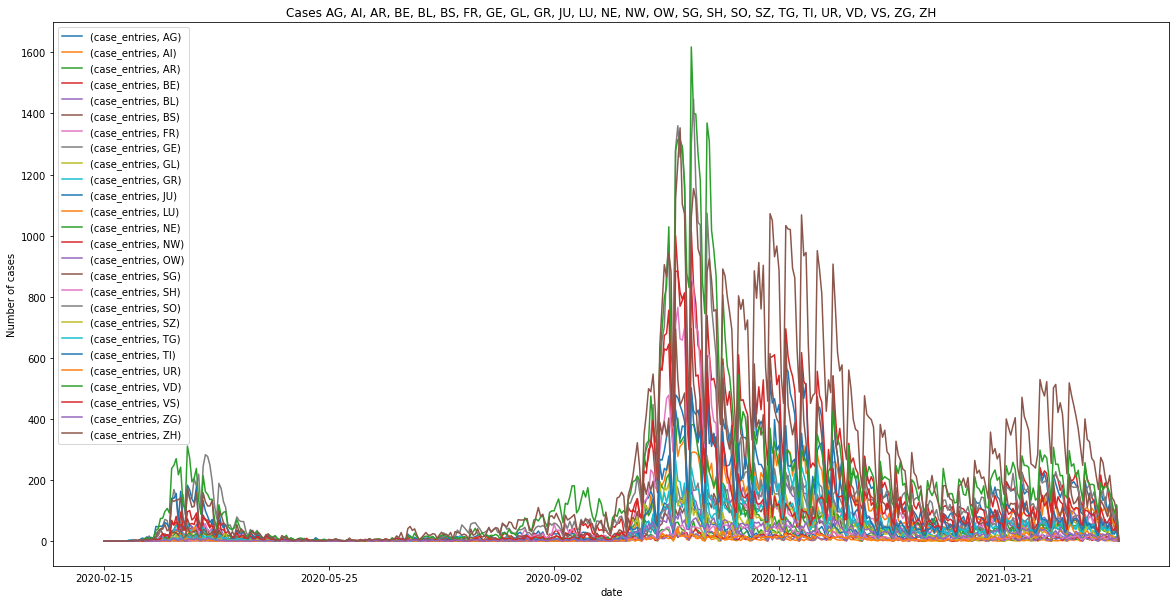

<Figure size 432x288 with 0 Axes>

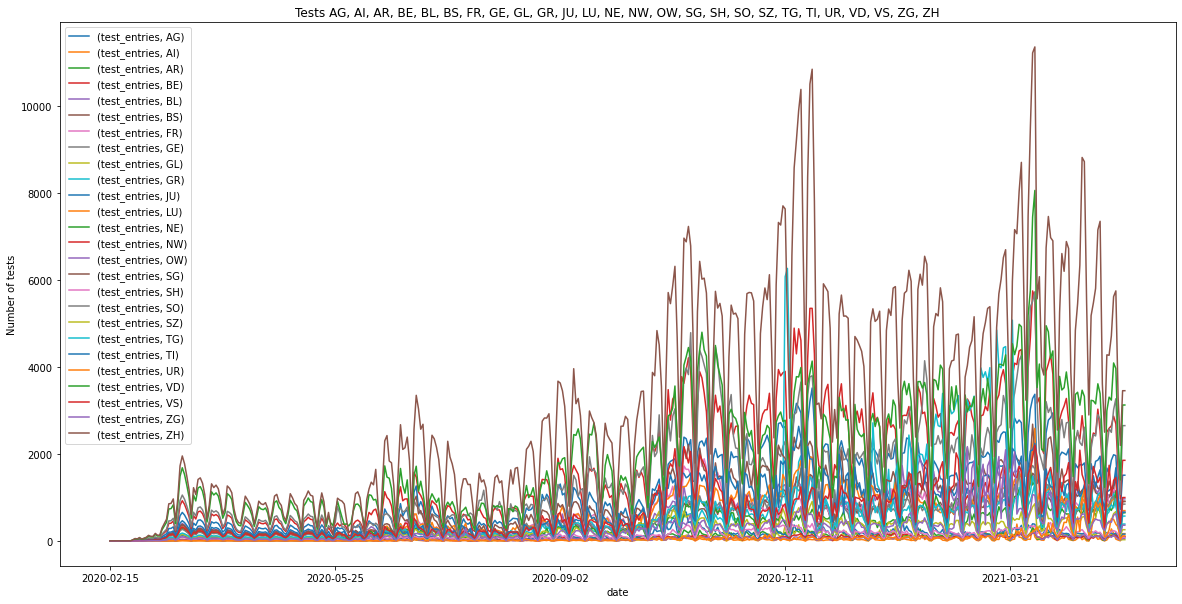

<Figure size 432x288 with 0 Axes>

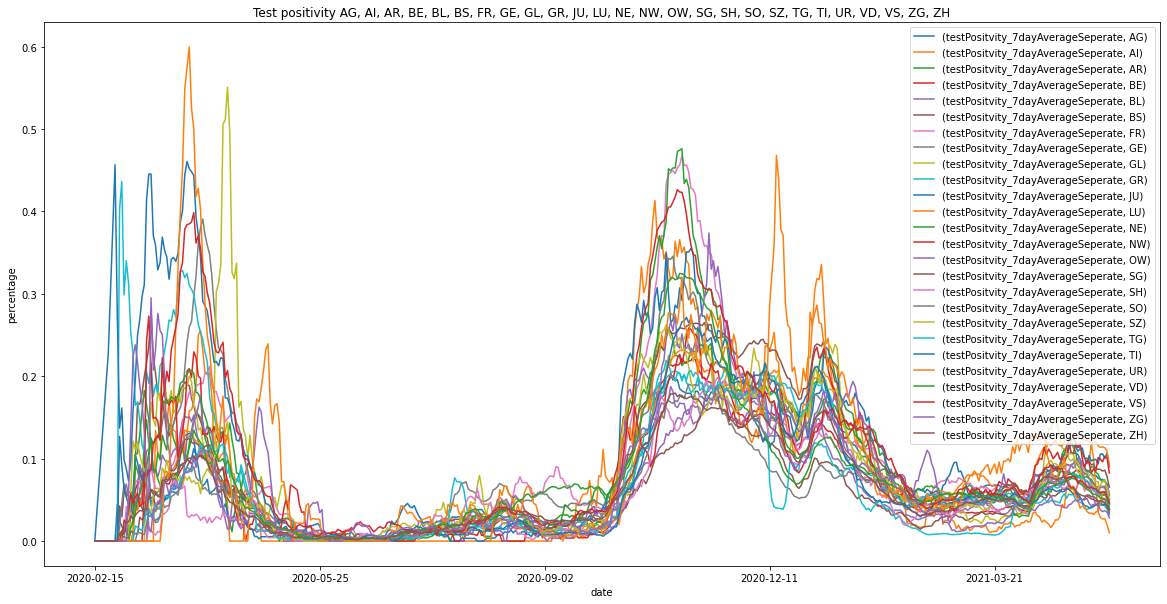

<Figure size 432x288 with 0 Axes>

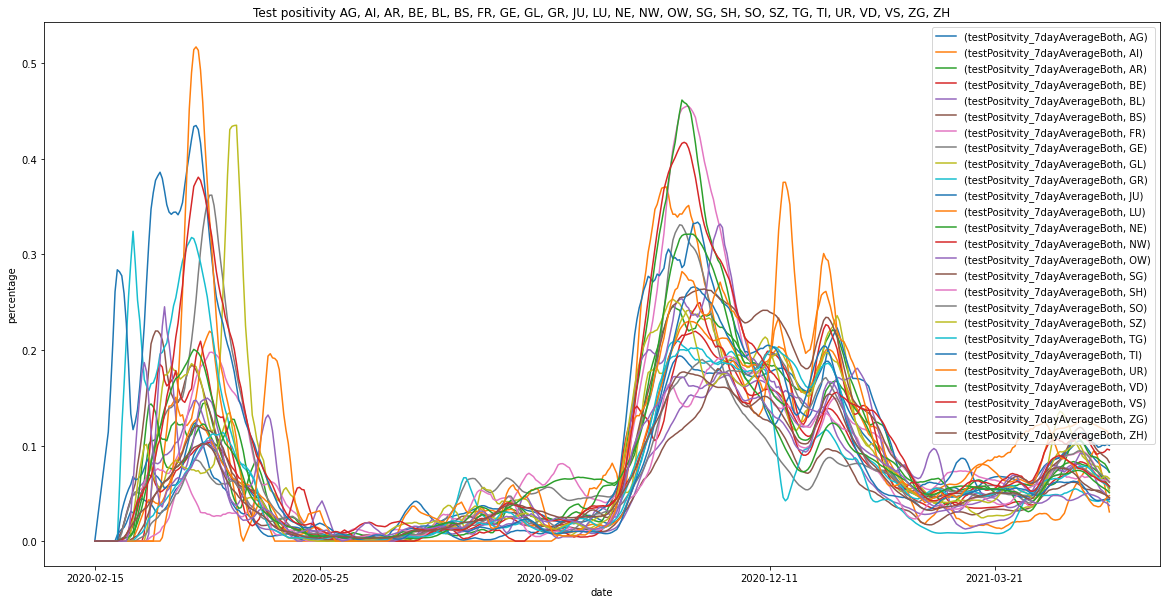

<Figure size 432x288 with 0 Axes>

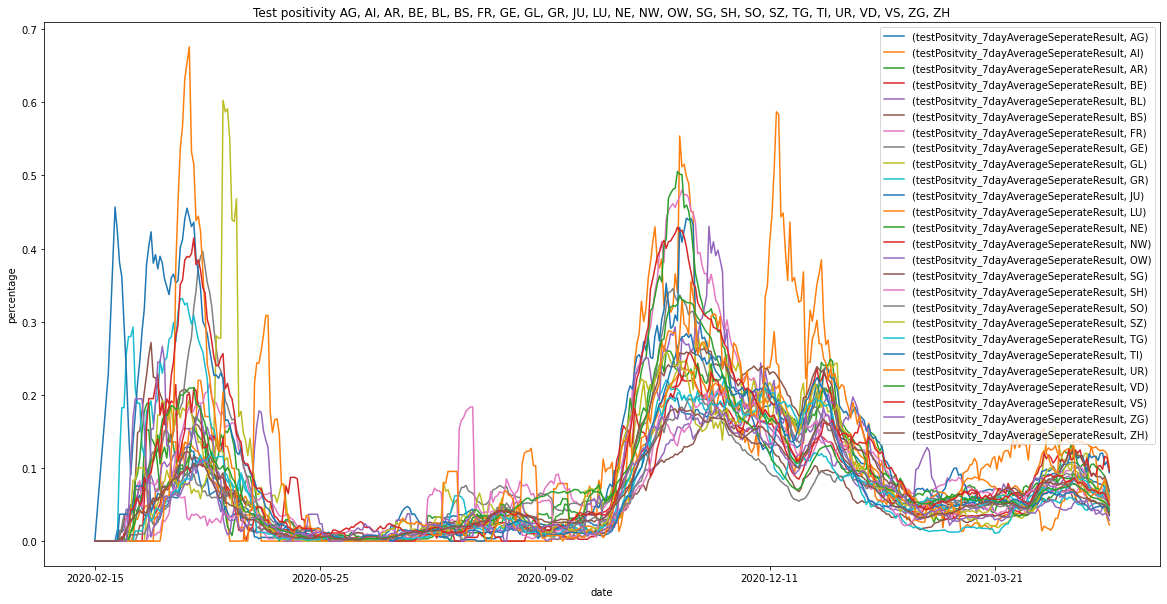

<Figure size 432x288 with 0 Axes>

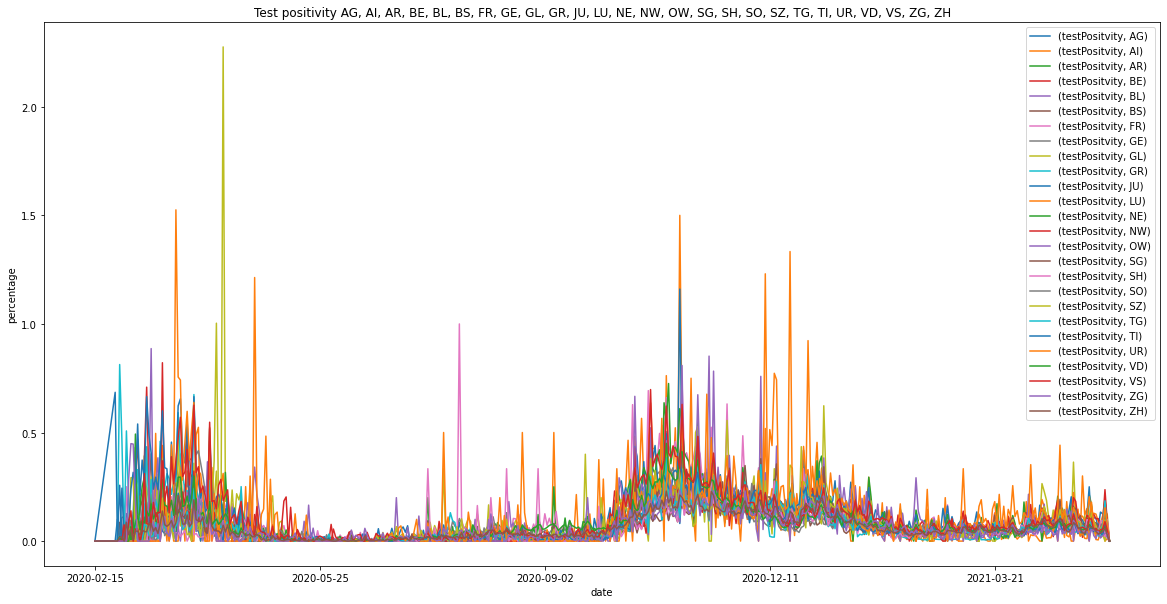

<Figure size 432x288 with 0 Axes>

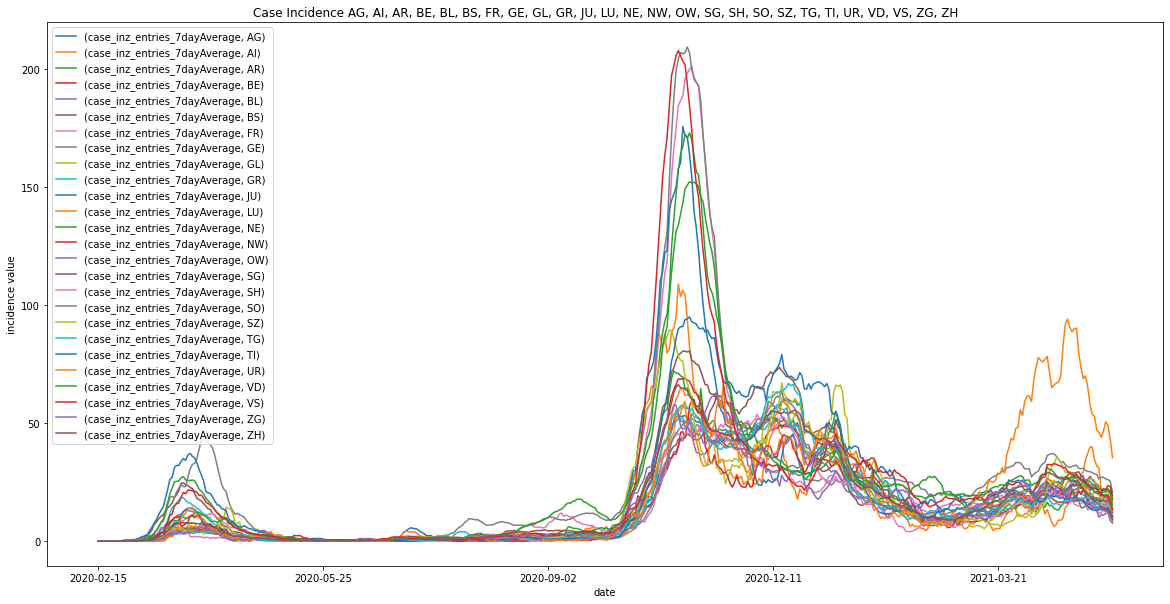

<Figure size 432x288 with 0 Axes>

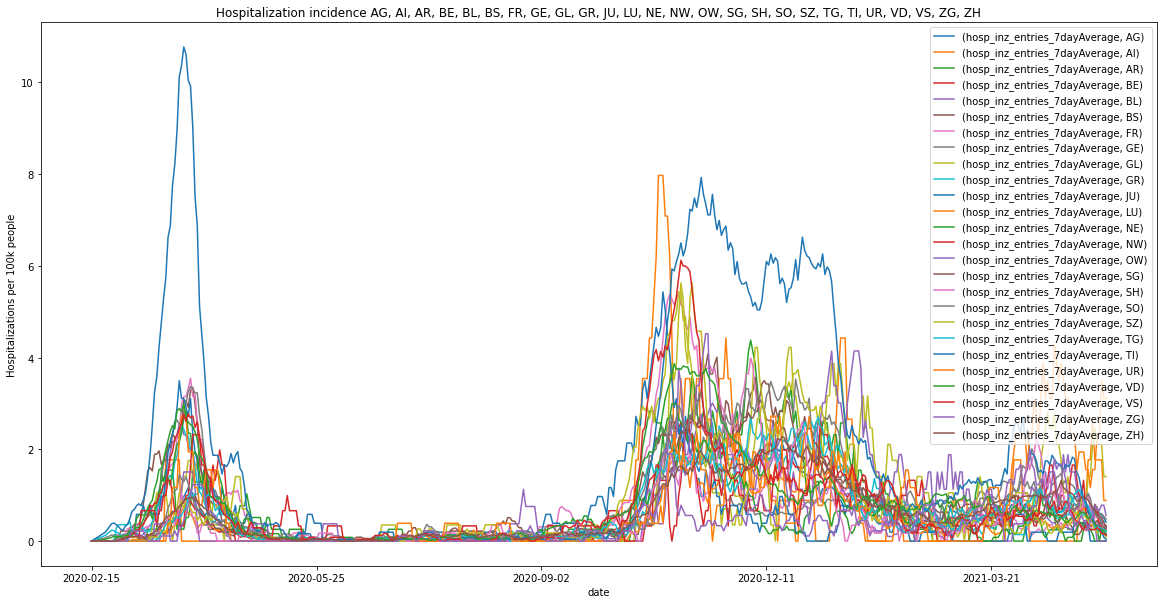

['case_entries_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'test_entries_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'testPositvity_7dayAverageSeperate_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'testPositvity_7dayAverageBoth_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'testPositvity_7dayAverageSeperateResult_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'testPositvity_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'case_inz_entries_7dayAverage_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png',
 'hosp_inz_entries_7dayAverage_AG_AI_AR_BE_BL_BS_FR_GE_GL_GR_JU_LU_NE_NW_OW_SG_SH_SO_SZ_TG_TI_UR_VD_VS_ZG_ZH.png']

<Figure size 432x288 with 0 Axes>

In [46]:
# Plot generator to compare one features with multiple cantons 
df = pd.DataFrame(index=dailyFeatures['JU'].index)

#cantonSelection = ['ZH','AG','AI']
cantonSelection = cantonKeys
'''
    'VaccDosesAdministered per100PersonsTotal_7dayAverage':('Total vaccine doses administered','total per 100 people'),
    'FullyVaccPersons per100PersonsTotal_7dayAverage':('Fully vaccinated people','total per 100 people'),
    'variant_perc_7dayAverage':('Percentage of variants of concern','Percentage'),
    'case_inz_entries_7dayAverage':('Case incidence','Cases per 100k people'),
    'case_inzsumTotal':('Total case incidence','Total cases per 100k people'),
   
    'hosp_inzsumTotal':('Total hospitalization incidence','Hospitalizations per 100k people'),
    'death_inz_entries_7dayAverage':('Death incidence','Deaths per 100k people'),
    'death_inzsumTotal':('Total death incidence','Total deaths per 100k people'),
    'test_inz_entries_7dayAverage':('Test incidence','Tests per 100k people'),
    'test_inzsumTotal':('Total test incidence','Total tests per 100k people'),
    'median_R_mean':('Estimated reproductive number R','reproductive number R'),
    'R_error':('R confidence','high-low confidence intervall'),
    'retail_and_recreation_percent_change_from_baseline':('retail & recreation mobility','percent change from baseline'),
    'grocery_and_pharmacy_percent_change_from_baseline':('grocery & pharmacy mobility','percent change from baseline'),
    'parks_percent_change_from_baseline':('park mobility','percent change from baseline'),
    'transit_stations_percent_change_from_baseline':('transit station mobility','percent change from baseline'),
    'workplaces_percent_change_from_baseline':('workplace mobility','percent change from baseline'),
    'residential_percent_change_from_baseline':('residential mobility','percent change from baseline'),
    'kofStrigency':('KOF strigency plus index','strigency values'), 
    'Borders':('Borders','Strigency state'),
    'Events':('Events','Strigency state'),
    'Gatherings/private events':('Gatherings/private events','Strigency state'),
    'Demonstrations':('Demonstrations','Strigency state'),
    'Primary (includes kindergarten) and lower secondary school':('Primary (includes kindergarten) and lower secondary school','Strigency state'),
    'Upper secondary school, vocational schools and higher education':('Upper secondary school, vocational schools and higher education','Strigency state'),
    'Universities and other educational establishments':('Universities and other educational establishments','Strigency state'),
    'Mountain railways':('Mountain railways','Strigency state'),
    'Homeworking':('Homeworking','Strigency state'),
    'Restaurants':('Restaurants','Strigency state'),
    'Discos/Nightclubs':('Discos/Nightclubs','Strigency state'),
    'Shops/Markets':('Shops/Markets','Strigency state'),
    'Penalties':('Penalties','Strigency state'),
    'Cultural, entertainment and recreational facilities':('Cultural, entertainment and recreational facilities','Strigency state'),
    'Sport/Wellness facilities':('Sport/Wellness facilities','Strigency state'),
    'Sport activities':('Sport activities','Strigency state'),
    'Religious services':('Religious services','Strigency state'),
    'Singing allowed':('Singing','Strigency state'),
    'maskMandatories':('Masks','Strigency state'),
    'isHoliday':('School vacations and Holidays', 'isHoliday'),
    'intervistaMob':('Intervista mobility', 'Median distance per person'),   
    'meanNeighborIncidence':('Mean neighbor incidence', 'Mean of neighbor 14-day incidence'),
    'maxNeighborIncidence':('Maximum neighbor incidence', 'Maximum of neighbor 14-day incidence'),
    'temp_min':('Minimum temperature','Kelvin'),
    'temp_max':('Maximum temperature','Kelvin'),
    'clouds':('Cloud level','cloudiness in percentage'),
    'precipitation':('Precipitation','l/m^2'),
    'testPositvity_7dayAverage':('Test positivity 7 day average','percentage'),
    'testPositvity':('Test positivity','percentage'),
    'ICU_AllPatients_inz':('All ICU patients','per 100k people'),
    'ICU_FreeCapacity_inz':('Free ICU capacity','Free ICU capacity per 100k people'),
    'ICU_Capacity_inz':('Total ICU Capacity','Total ICU Capacity per 100k people'),
    'ICU_Covid19Patients_inz':('Covid 19 ICU patients','Covid 19 ICU patients per 100k people'),
    'ICU_NonCovid19Patients_inz':('Non Covid ICU patients','Non Covid ICU patients per 100k people'),
    'Total_AllPatients_inz':('Total patients','Total patients per 100k people'),
    'Total_Covid19Patients_inz':('Total Covid 10 patients','Total Covid 10 patients per 100k people'),
    'Total_Capacity_inz':('Total hospital capacity','Total hospital capacity per 100k people'),
    'Total_NonCovid19Patients_inz':('Total non Covid patients','Total non Covid patients per 100k people'),
    'Total_FreeCapacity_inz':('Total free capacity','Total free capacity per 100k people'),
        'test_entries':('Test entries', 'number of tests'),
    'test_inz_entries_7dayAverage':('Test incidence 7 day average','Tests per 100k people'),
    'testPositvity_7dayAverage':('Test positivity 7 day average','percentage'),
    
'''

featureTitles = { #(Title, y-axis)
    'case_entries':('Cases','Number of cases'),
    'test_entries':('Tests','Number of tests'),
    'testPositvity_7dayAverageSeperate':('Test positivity','percentage'),
    'testPositvity_7dayAverageBoth':('Test positivity','percentage'),
    'testPositvity_7dayAverageSeperateResult':('Test positivity','percentage'),
    'testPositvity':('Test positivity','percentage'),
    'case_inz_entries_7dayAverage':('Case Incidence','incidence value'),
    'hosp_inz_entries_7dayAverage':('Hospitalization incidence','Hospitalizations per 100k people'),
}

for cantonId in cantonKeys:
    for f in featureTitles:
        df[f,cantonId] = dailyFeatures[cantonId][[f]]

listOfPics = []
for f in featureTitles:
    #plot all cantons
    #df[[(f,cantonId) for cantonId in cantonKeys]].plot(kind='line', title=featureTitles[f][0], ylabel=featureTitles[f][1],figsize=(20,10))
    #plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_allCantons.png')
    
    #plot canton selection
    df[[(f,cantonId) for cantonId in cantonSelection]].plot(kind='line', title=featureTitles[f][0]+" "+listToStringComma(cantonSelection), ylabel=featureTitles[f][1],figsize=(20,10))
    plt.show()
    plt.savefig('plots/'+f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
    listOfPics.append(f.replace('/','').replace(' ','')+'_'+listToStringUnderline(cantonSelection)+'.png')
display([e for e in listOfPics])

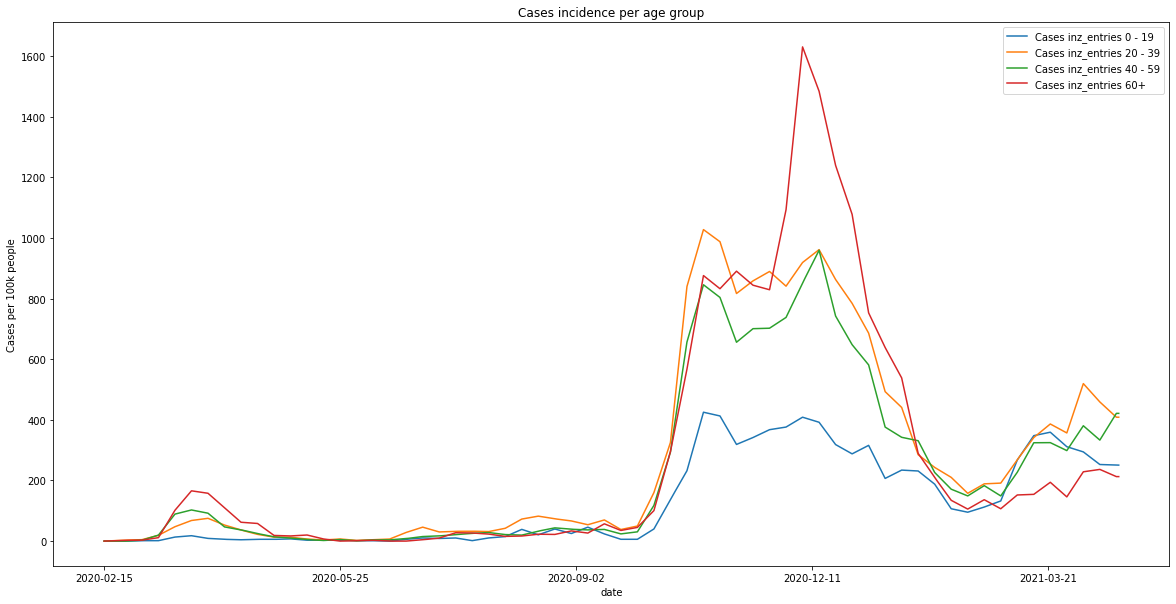

<Figure size 432x288 with 0 Axes>

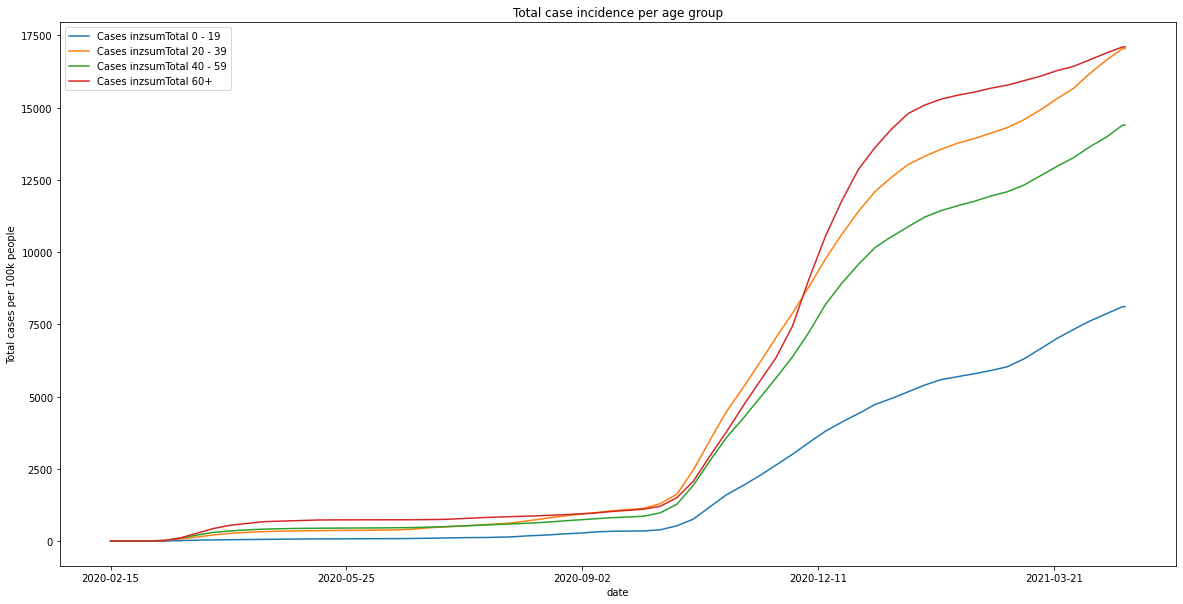

<Figure size 432x288 with 0 Axes>

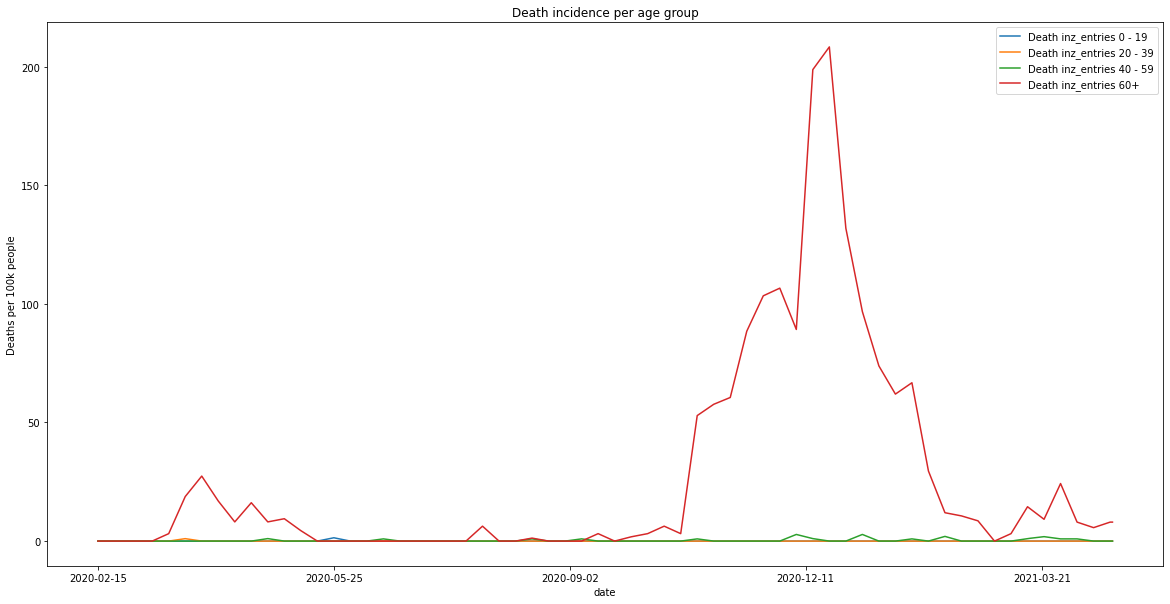

<Figure size 432x288 with 0 Axes>

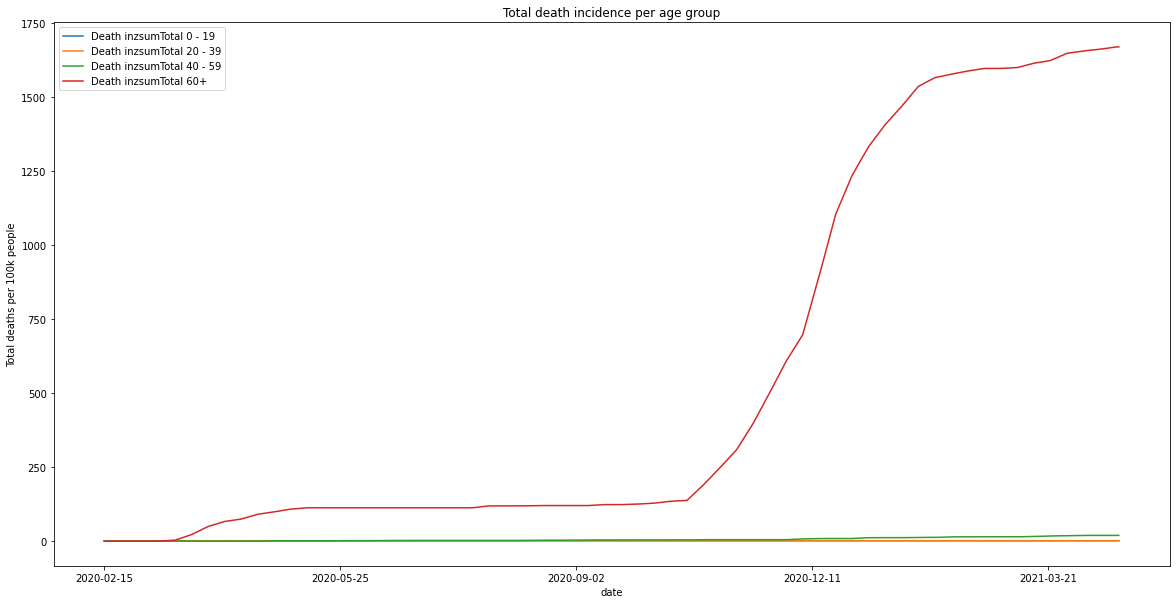

<Figure size 432x288 with 0 Axes>

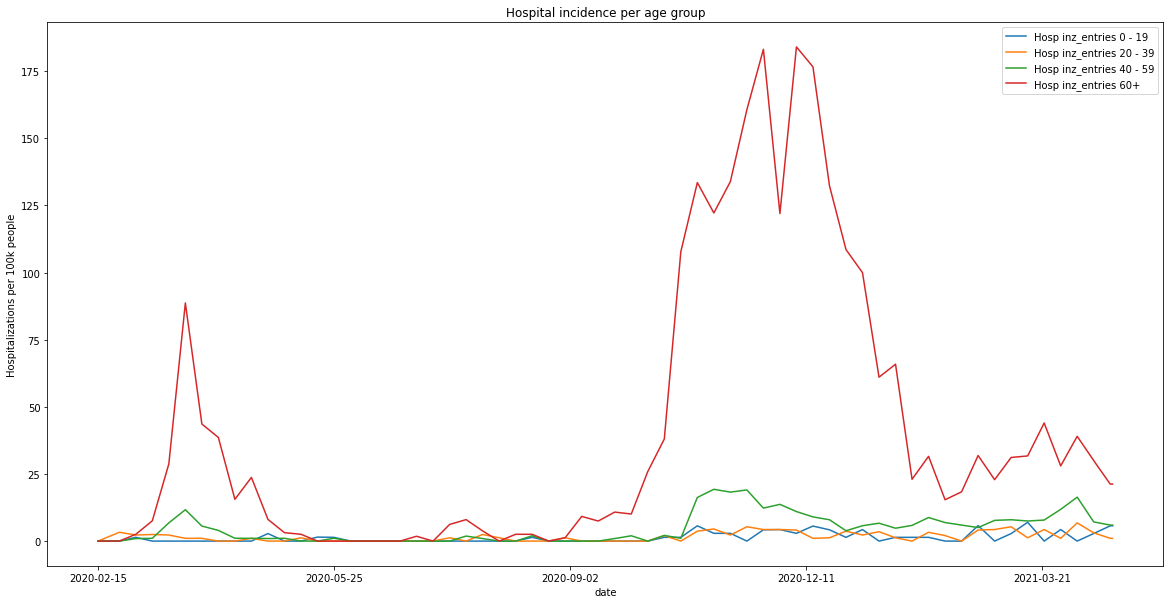

<Figure size 432x288 with 0 Axes>

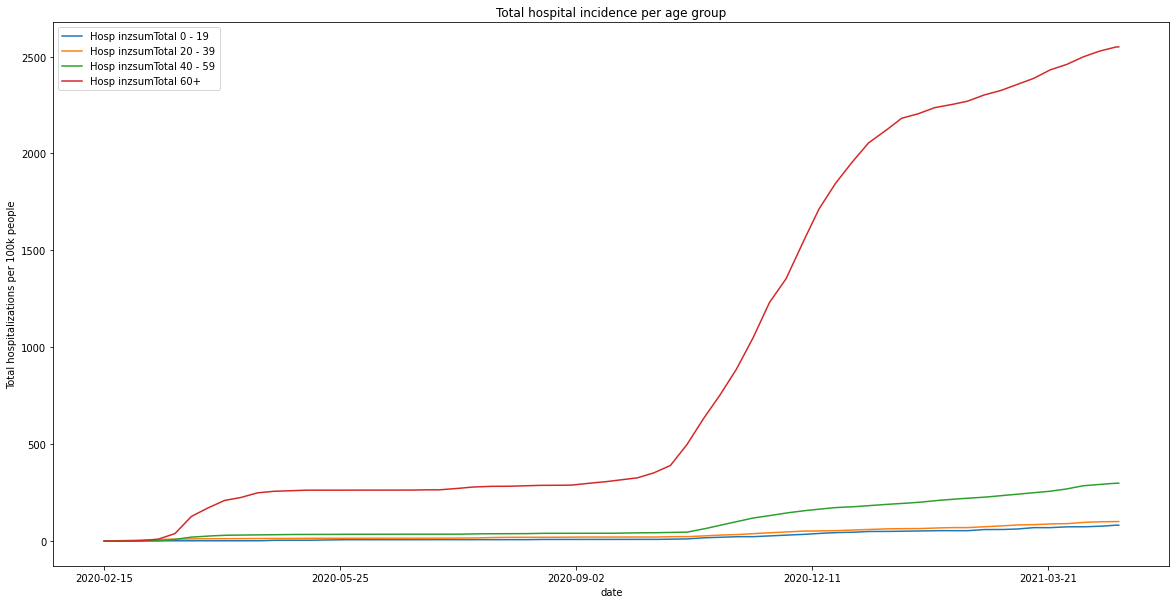

<Figure size 432x288 with 0 Axes>

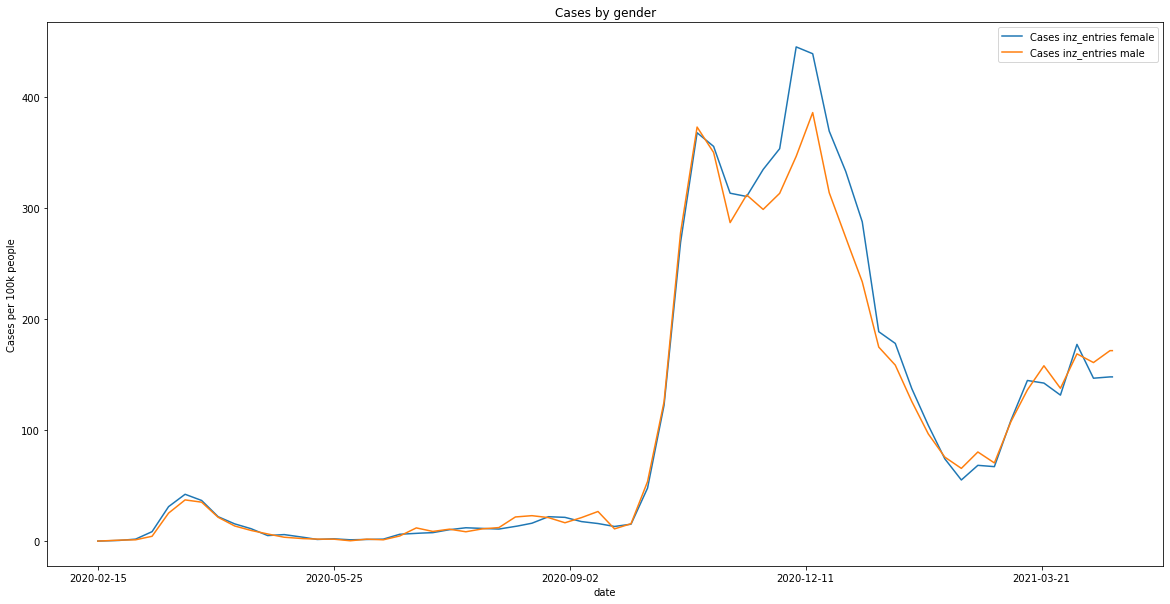

<Figure size 432x288 with 0 Axes>

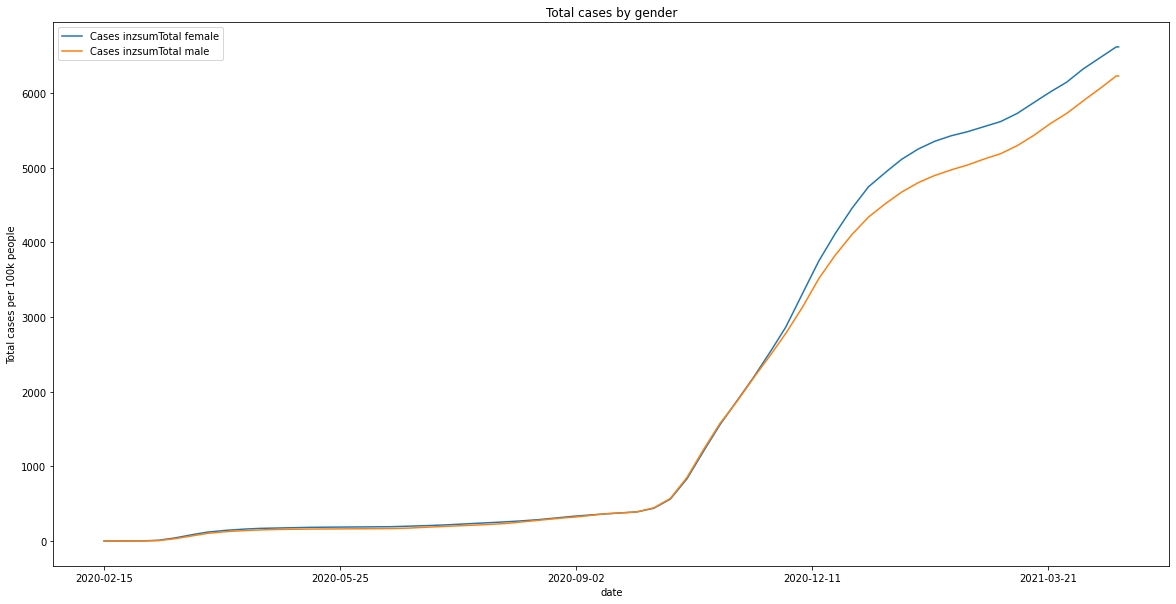

<Figure size 432x288 with 0 Axes>

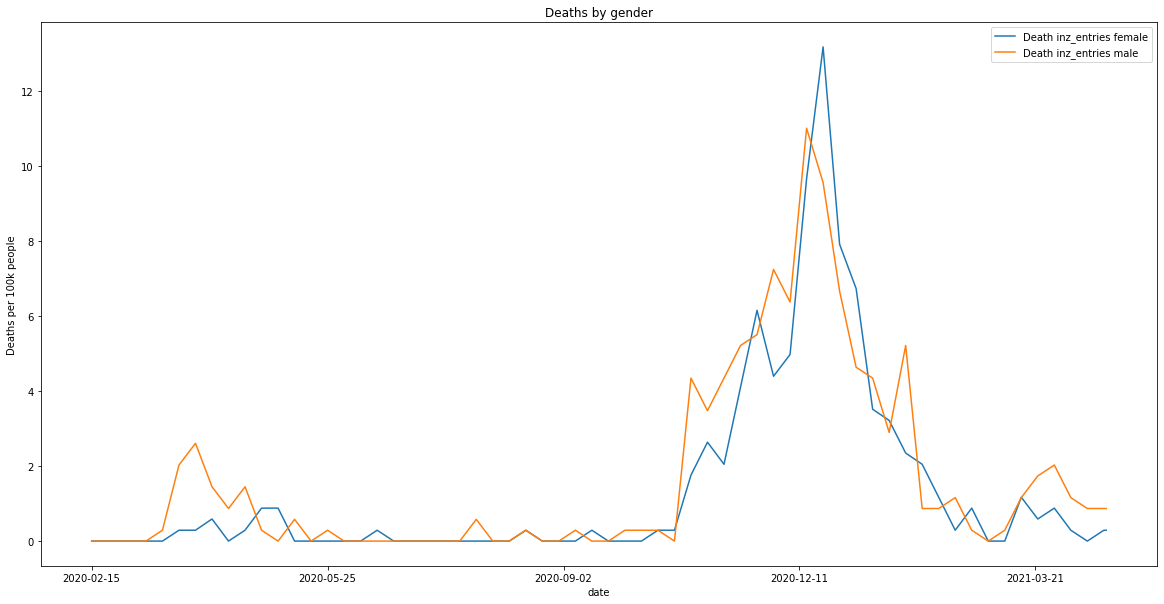

<Figure size 432x288 with 0 Axes>

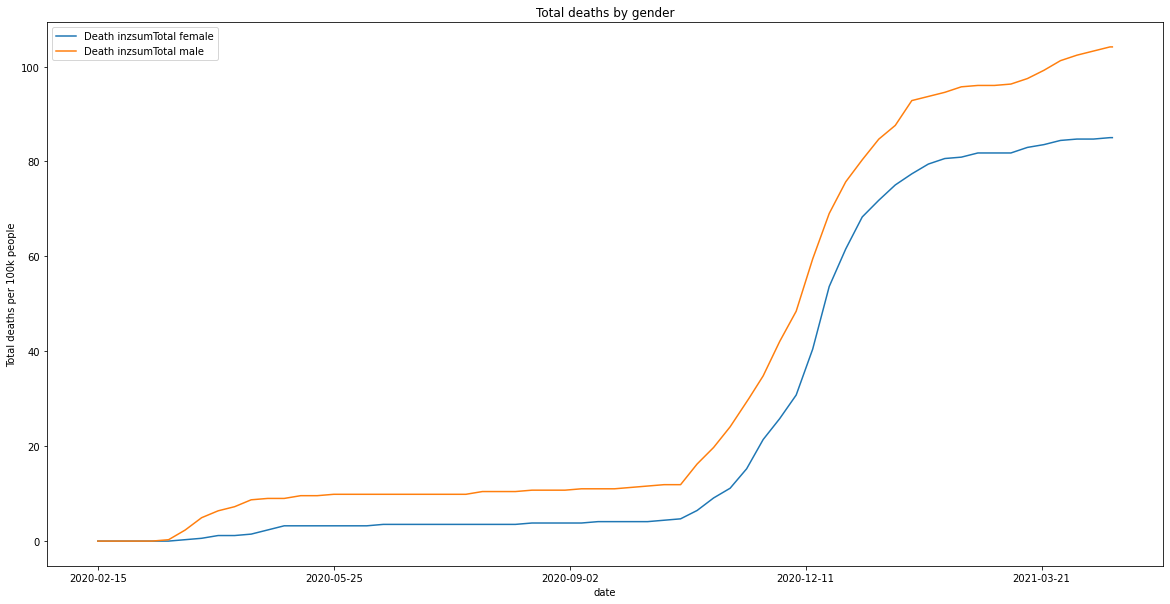

<Figure size 432x288 with 0 Axes>

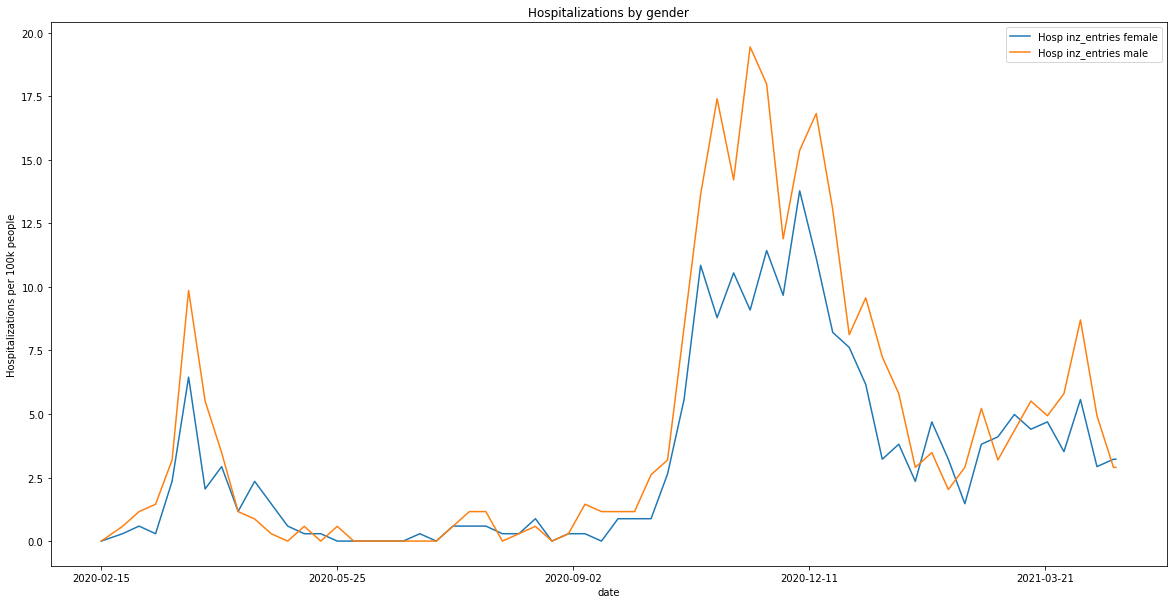

<Figure size 432x288 with 0 Axes>

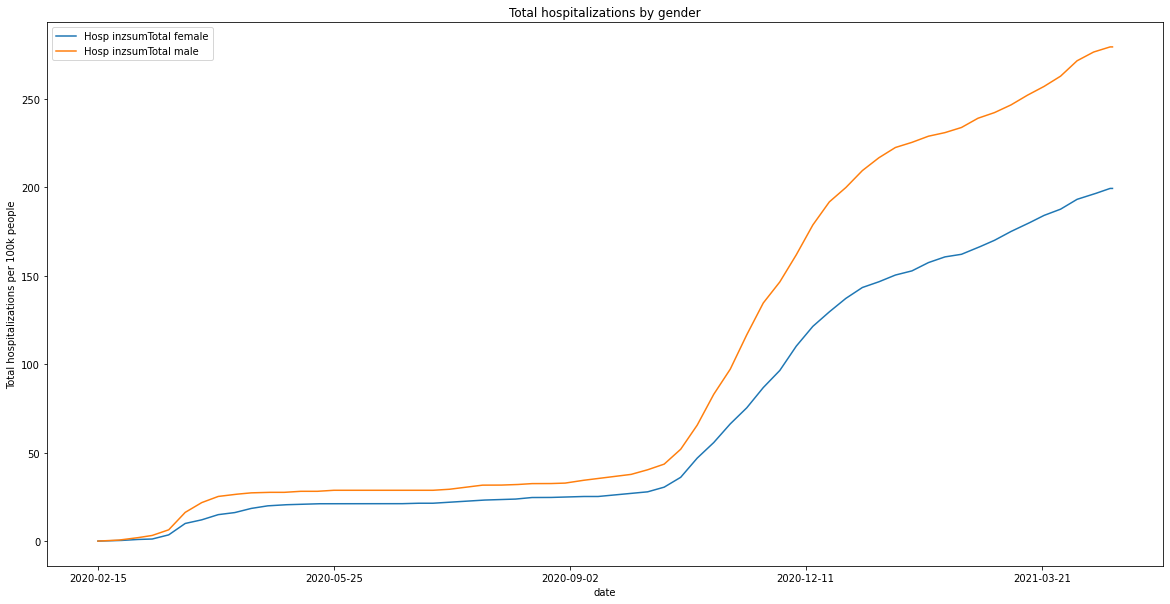

<Figure size 432x288 with 0 Axes>

In [20]:
# plot generator to compare multiple features in one canton
df = pd.DataFrame(index=dailyFeatures['AG'].index)
cantonSelection = 'AG'
featureLists = { #(Title, ylabel)
    'Cases incidence per age group':(['Cases inz_entries 0 - 19',
                            'Cases inz_entries 20 - 39','Cases inz_entries 40 - 59','Cases inz_entries 60+'],"Cases per 100k people"),
    'Total case incidence per age group':(['Cases inzsumTotal 0 - 19','Cases inzsumTotal 20 - 39',
                                           'Cases inzsumTotal 40 - 59','Cases inzsumTotal 60+'],"Total cases per 100k people"),
    'Death incidence per age group':(['Death inz_entries 0 - 19',
                                     'Death inz_entries 20 - 39',
                                     'Death inz_entries 40 - 59',
                                     'Death inz_entries 60+'],"Deaths per 100k people"),
    'Total death incidence per age group':(['Death inzsumTotal 0 - 19',  
                                         'Death inzsumTotal 20 - 39',          
                                         'Death inzsumTotal 40 - 59',
                                         'Death inzsumTotal 60+'],"Total deaths per 100k people"),
    'Hospital incidence per age group':([ 'Hosp inz_entries 0 - 19', 
                                         'Hosp inz_entries 20 - 39',
                                         'Hosp inz_entries 40 - 59',
                                         'Hosp inz_entries 60+'],"Hospitalizations per 100k people"),
    'Total hospital incidence per age group':(['Hosp inzsumTotal 0 - 19',
                                             'Hosp inzsumTotal 20 - 39',
                                             'Hosp inzsumTotal 40 - 59',
                                             'Hosp inzsumTotal 60+'],"Total hospitalizations per 100k people"),
    'Cases by gender':(['Cases inz_entries female',
                         'Cases inz_entries male'],"Cases per 100k people"),
    'Total cases by gender':(['Cases inzsumTotal female',
                             'Cases inzsumTotal male'],"Total cases per 100k people"),
    'Deaths by gender':(['Death inz_entries female',
                         'Death inz_entries male'],"Deaths per 100k people"),
    'Total deaths by gender':([ 'Death inzsumTotal female',
                                 'Death inzsumTotal male'],"Total deaths per 100k people"),
    'Hospitalizations by gender':([ 'Hosp inz_entries female',
                                     'Hosp inz_entries male'],"Hospitalizations per 100k people"),
    'Total hospitalizations by gender':([ 'Hosp inzsumTotal female',
                                         'Hosp inzsumTotal male'],"Total hospitalizations per 100k people")
}



for featureKey in featureLists:
    dailyFeatures[cantonSelection][featureLists[featureKey][0]].plot(kind='line', title=featureKey, figsize=(20,10), ylabel=featureLists[featureKey][1])
    plt.show()
    plt.savefig('plots/feature_comparison_'+featureKey.replace('/','').replace(' ','')+'_'+cantonSelection+'.png')



In [23]:
# one feature all cantons
'test_inz_entries_7dayAverage'

In [ ]:
#df.plot(kind='scatter', x='x', y='y', label='Scatter')

'''
for cantonId in cantonKeys:
    y = 'maxNeighborIncidence'
    scondary_y = 'case_inz_entries'
    #df[[(y,cantonId),(scondary_y,cantonId)]].plot(kind='line', title="Maximum neighbor incidence vs. actual cantonal incidence",figsize=(20,10), y=[(y,cantonId),(scondary_y,cantonId)], secondary_y=[(scondary_y,cantonId)], sharey=False)  

df2=pd.DataFrame(index=df.index)
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1)))
df2[['maxNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['meanNeighborIncidenceSwissMean']] = pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].mean(axis=1))
df2[['case_inz_entriesSwissMean']] = pd.DataFrame(df[[('case_inz_entries',cantonId) for cantonId in cantonKeys]].mean(axis=1))
#display(df2)
y = 'meanNeighborIncidenceSwissMean'
scondary_y = 'case_inz_entriesSwissMean'
df2[[y,scondary_y]].plot(kind='line', title="",figsize=(20,10), y=[y, scondary_y], secondary_y=scondary_y, sharey=False)
'''
#display(pd.DataFrame(df[[('maxNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMaxIncidence']).sort_values(by='SumMaxIncidence'))
#display(pd.DataFrame(df[[('meanNeighborIncidence',cantonId) for cantonId in cantonKeys]].sum(), columns=['SumMeanIncidence']).sort_values(by='SumMeanIncidence'))


'''
from scipy.ndimage.interpolation import shift
copy = dict['AG'].copy()

dict['AG']['case_entries_shifted'] = np.roll(np.array(copy['case_entries']), 14)


corr_matrix = dict['AG'].corr()
display(corr_matrix['case_entries_shifted'].sort_values(ascending=False))
'''